In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression 

### Create Data

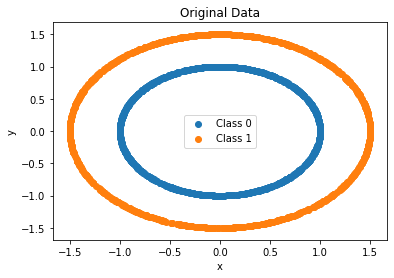

X.shape for the data: (2000, 2)
y.shape for the labels: (2000, 1)


In [10]:
innerRadiusTrue = 1
bias = 0.5
outerRadiusTrue = innerRadiusTrue+bias
Npoints = 1000
angles = 2*np.pi*np.random.random(Npoints)
xInner = innerRadiusTrue*np.cos(angles).reshape((Npoints,1))
yInner = innerRadiusTrue*np.sin(angles).reshape((Npoints,1))
plt.scatter(xInner,yInner,label="Class 0")
angles = 2*np.pi*np.random.random(Npoints) #Random angles in [0,2pi]
xOuter = outerRadiusTrue*np.cos(angles).reshape((Npoints,1))
yOuter = outerRadiusTrue*np.sin(angles).reshape((Npoints,1))
plt.scatter(xOuter,yOuter,label="Class 1")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Original Data")
plt.legend()
plt.show()
xInnerSq = xInner**2
xOuterSq = xOuter**2
Xinner = np.concatenate((xInnerSq,yInner),axis=1)
Xouter = np.concatenate((xOuter,yOuter),axis=1)
X = np.concatenate((Xinner,Xouter),axis=0)
print(f"X.shape for the data: {X.shape}")
y = np.concatenate((np.zeros((Npoints,1)),np.ones((Npoints,1))),axis=0)
print(f"y.shape for the labels: {y.shape}")

In [5]:
def sigma(z):
    '''Computes the sigmoid for a numpy array z
    '''
    return 1/(1+np.exp(-z))

In [6]:
def computeGradientNonLinear(x,y,z):
    '''Computes the gradient for the cross entropy loss function. x,y are (n,) numPy arrays, signifying the 2 features.
       z =  theta0+theta1x+theta2y is an (n,) numPy array. Returns the (3,) gradient at the current iteration.
    '''
    n = x.shape[0]
    sigma_z = sigma(z)
#     print(f"sigma_z: {sigma_z}")
#     print(f"sigma_z.shape: {sigma_z.shape}")
#     estimation_error = (y/sigma_z)-((1-y)/(1-sigma_z))
    estimation_error = sigma_z-y
    term1 = sum(sigma_z*(1-sigma_z)*estimation_error)
    term2 = sum(x*sigma_z*(1-sigma_z)*estimation_error)
    term3 = sum(y*sigma_z*(1-sigma_z)*estimation_error)
    return (np.array([term1,term2,term3]))/n
    
    

In [7]:
def GradientDescentNonLinear(X,y,start,step_size,tolerance,Niter):    
    ''' Will perform gradient descent on X (nx2), using target y (nx1) 
    '''    
    gradNorm = 10000
    i = 0
    current_theta_estimate = start
    norms = []
    n = X.shape[0]            
    while i<Niter and gradNorm > tolerance:        
        z_estimate = current_theta_estimate[0]+current_theta_estimate[1]*X[:,0] + current_theta_estimate[2]*X[:,1]
#         print(f"z_estimate.shape = {z_estimate.shape}")
#         print(f"z_estimate = {z_estimate}")
        grad = computeGradientNonLinear(X[:,0],X[:,1],z_estimate)
#         print(f"grad = {grad}")
        gradNorm = np.linalg.norm(grad)
        norms.append(gradNorm)        
        current_theta_estimate = current_theta_estimate - step_size*grad
        i+=1
    plt.plot(np.array(list(range(1,i+1))),norms)
    plt.xlabel('Iterations')
    plt.ylabel('||gradient||')
    plt.grid(True)
    plt.title("Convergence of gradient descent")
    print(f"Started at location {start}")
    print(f"Finished with {i} iterations")
    print(f"Finished with gradient norm = {gradNorm}")
    print(f"Finished at location {current_theta_estimate}")
    return current_theta_estimate
    

In [8]:
def VanillaLogisticRegressionNonLinear(X,y):    
    '''Assumes that the input matrix is an nx2 numPy array with n observations and y is an nx1 target vector 
    '''
    n = X.shape[0]
#     theta_estimate_start = np.random.rand(3)
    theta_estimate_start = np.array([0,1,1])
    theta_estimate_start = np.array([0,1.5,2])
    learning_rate = 1e-6
    err_tolerance = 1e-6
    MaxIter = 8000
    estimated_coeff = GradientDescentNonLinear(X,y,theta_estimate_start,learning_rate,err_tolerance,MaxIter)
    return estimated_coeff

   

    
    

Started at location [0.  1.5 2. ]
Finished with 8000 iterations
Finished with gradient norm = 0.11734195571689643
Finished at location [-6.02490666e-04  1.49947988e+00  2.00049799e+00]
theta estimated [ theta0,theta1, theta2]: [-6.02490666e-04  1.49947988e+00  2.00049799e+00]
Radius estimated : 1.4994800038539466
Original Radius : 1.25
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Sum error: 0.0
Error probability : 0.0


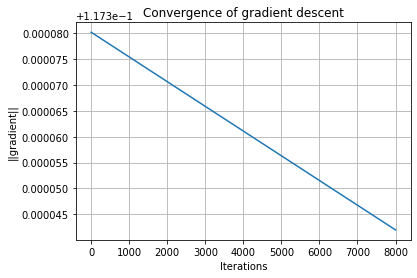

In [11]:
y=y.reshape(2*Npoints,)
theta_est = VanillaLogisticRegressionNonLinear(X,y)
print(f"theta estimated [ theta0,theta1, theta2]: {theta_est}")
radius_true = (innerRadiusTrue+outerRadiusTrue)/2
radius_est = np.sqrt(theta_est[0]**2 + theta_est[1]**2)
print(f"Radius estimated : {radius_est}")
print(f"Original Radius : {radius_true}")
y_pred_algo = list(map(lambda q: 0 if q<radius_est else 1,(np.sqrt(X[:,0]**2+X[:,1]**2))))
print(y_pred_algo[Npoints-5:Npoints+6])
y_pred_algo = np.array(y_pred_algo)
y = y.reshape(2*Npoints)
sumErr = sum(abs(y_pred_algo-y))
print(f"Sum error: {sumErr}")
errRate = sumErr/(2*Npoints)
print(f"Error probability : {errRate}")
